In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import random

In [5]:
df = pd.read_csv('temporal_samplings_2.csv')

# LOAD EXAMPLE FILE
example = xr.open_dataset('/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/predictor_fields/predictor_fields_hist_ssp370_merged_updated.nc')
years = np.unique(example.time.dt.year)
indices = [i for i in range(len(years))]


for sample_n in df:

    selected_years = df[sample_n].values
    selected_years = selected_years[~np.isnan(selected_years)]
    selected_years = [int(v) for v in selected_years]

    unselected_years = [val for val in years if val not in selected_years]

    if len(selected_years) + len(unselected_years) == 140:
        print(f'{sample_n}: OK')
    else:
        print(f'{sample_n}: not OK')


5: OK
10: OK
20: OK
30: OK
40: OK
50: OK
60: OK
70: OK
80: OK
90: OK
100: OK
110: OK
120: OK
130: OK
140: OK


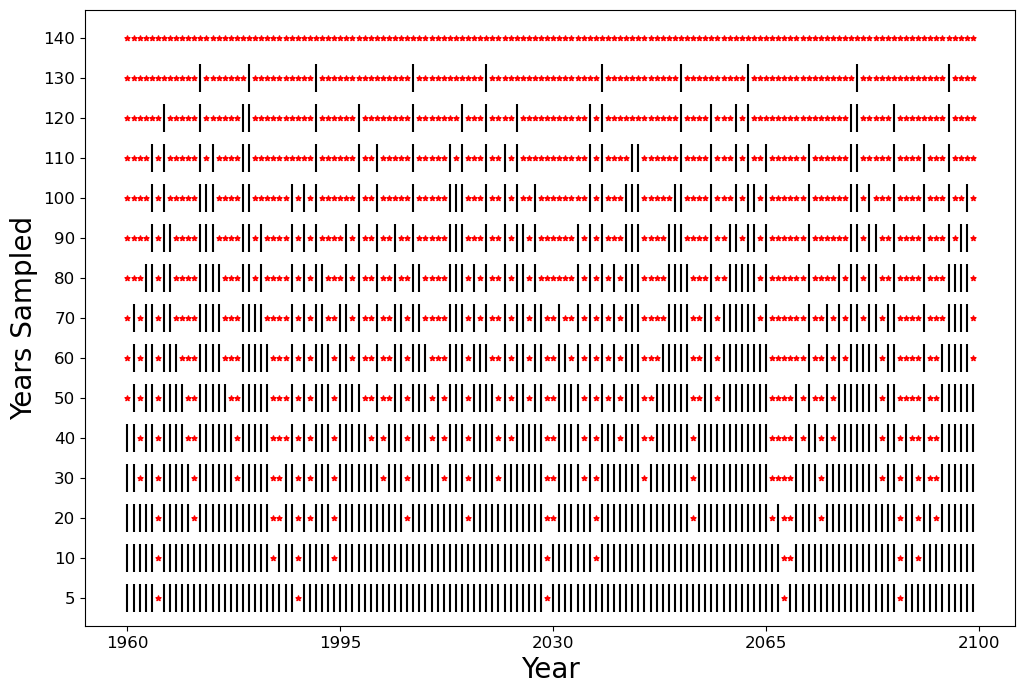

In [6]:
plot_temporal_samplings(df)

In [3]:
'''
LOAD SAVED SAMPLINGS, PLOT
'''

def plot_temporal_samplings(df):
    
    fig,axs = plt.subplots(figsize=(12,8))
    
    for sample_n in df:
    
        selected_years = df[sample_n].values
        selected_years = selected_years[~np.isnan(selected_years)]
        selected_years = [int(v) for v in selected_years]
        
        unselected_years = [val for val in years if val not in selected_years]
        
        axs.scatter(selected_years,[sample_n for i in range(len(selected_years))],c='red',s=14,marker='*')
        axs.scatter(unselected_years,[sample_n for i in range(len(unselected_years))],c='black',s=400,marker='|')
        
    axs.set_yticks(df.columns,labels=[str(v) for v in df.columns],fontsize=12)
    axs.set_ylabel('Years Sampled',fontsize=20)
    
    year_ticks = [1960,1995,2030,2065,2100]
    axs.set_xticks(year_ticks,[str(val) for val in year_ticks],fontsize=12)
    axs.set_xlabel('Year',fontsize=20)



In [49]:
'''
Do stratified random selection of year indices for increasing increments of sample sizes 
while retaining indices of previous sampling. 
'''

# LOAD EXAMPLE FILE
example = xr.open_dataset('/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/predictor_fields/predictor_fields_hist_ssp370_merged_updated.nc')

years = np.unique(example.time.dt.year)

def stratified_sampling(array,sampling):

    selected_years = []
    for ar in np.array_split(np.array(array),sampling):

        selected_years.append(random.sample(list(ar),1)[0])
        
    return(selected_years)


# DO SELECTION
increments = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140]

years_left = years
samplings = {}

previous_inc = 0
previous_years = []
for inc in increments:
    sample_n = inc - previous_inc
    
    selected_years = stratified_sampling(years_left,sample_n)
    samplings[inc] = previous_years + selected_years

    
    years_left = [val for val in years if val not in samplings[inc]]
    
    previous_inc = inc
    previous_years = samplings[inc]

# SAVE YEAR SAMPLINGS

years_df = pd.DataFrame({sample_n:pd.Series(years) for sample_n,years in samplings.items()})


'\nfor sample_n in years_df:\n    print(sample_n)\n\n    selected_years = years_df[sample_n].values\n    selected_years = selected_years[~np.isnan(selected_years)]\n    selected_years = [int(v) for v in selected_years]\n\n    unselected_years = [val for val in years if val not in selected_years]\n\n    print(len(selected_years))\n    print(len(unselected_years))\n    \n    print()\n'

In [60]:
years_df.to_csv('temporal_samplings_2.csv',index=False)
